In [1]:
import requests
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
from tqdm import tqdm
sys.path.append("../../scanpix/")

from ml.helpers import get_image_from_url

In [2]:
def plot_results(res, query, cols=5):
    cols = min(cols, len(res))
    plt.figure(figsize=(20, 6))
    rows = int(np.ceil(len(res) / cols))
    res = sorted(res, key=lambda x: x[1], reverse=True)
    for r, result in enumerate(res):
        plt.subplot(rows, cols, r+1)
        plt.imshow(get_image_from_url(result[1]))
        plt.title(f"{result[0]}: {np.round(result[2], 2)}")
    plt.suptitle(f"query: {query}")
    plt.show()

# Create index for the images

Total images: 5000


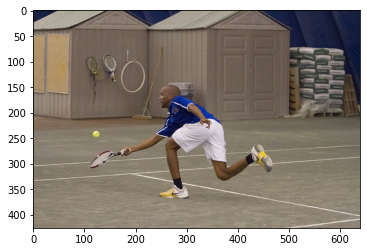

In [7]:
BASEURL = "http://0.0.0.0:5001/process_image"
IMG_PATH = "../data/val2017/"
imgs = [x for x in os.listdir(IMG_PATH) if x.split('.')[-1] in ['jpg', 'png', 'jpeg']]
print(f"Total images: {len(imgs)}")

plt.imshow(get_image_from_url(f"{IMG_PATH}/{imgs[0]}"))

In [9]:
img_index = []
for img in tqdm(imgs):
    res = requests.get(url=f"{BASEURL}", params={'url': f"{IMG_PATH}/{img}"}).json()
    res['file_name'] = img
    img_index.append(res)

100%|███████████████████████████████████████████████████████████| 5000/5000 [46:11<00:00,  1.80it/s]


In [17]:
%%timeit
np.dot(img_index[0]['clip_embedding'], img_index[0]['clip_embedding'])

83.3 µs ± 4.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
OUTPUT_PATH = "../data/"
with open(f'{OUTPUT_PATH}/index_big.json', 'w', encoding='utf-8') as f:
    json.dump(img_index, f, indent=4)

# Query with a prompt

In [33]:
BASEURL = "http://0.0.0.0:5001/process_text"

with open(f'{OUTPUT_PATH}/index.json', 'r') as fob:
    img_index = json.load(fob)

In [34]:
query = "a pug with a cone"
res = requests.get(url=f"{BASEURL}", params={'text': query}).json()
text_embedding = res['clip_embedding']
result = []
for index in img_index:
    result.append((index['file_name'], np.dot(text_embedding, index['clip_embedding'])))

result

[('7.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/7.jpg',
  0.05590805611920523),
 ('3.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/3.jpg',
  0.12773004340315736),
 ('4.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/4.jpg',
  0.20918908322841556),
 ('9.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/9.jpg',
  0.0941913489521203),
 ('1.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/1.jpg',
  0.1910530803460112),
 ('5.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/5.jpg',
  0.26285255441033245),
 ('10.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/10.jpg',
  0.1362048758311439),
 ('6.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/6.jpg',
  0.17038957206761748),
 ('8.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/images/8.jpg',
  0.12578877649031922),
 ('2.jpg',
  '/home/nuwandavek/Documents/rocketship/scanpix/data/

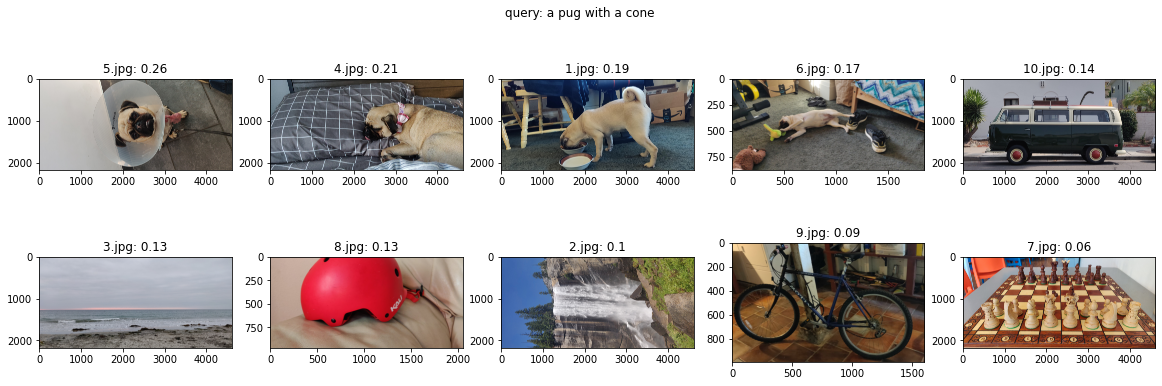

In [35]:
plot_results(result, query)